## Sales Platforms

The goal is to predict sales based on the budgeting spend on various (TV, Radio, Newspaper) platforms for advertising. 

---

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import dataset

ad_df = pd.read_csv('~/Documents/GitHub/real-application/data/advertising.csv')
ad_df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
# Dataset information

ad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
# Dataset summary

ad_df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:>

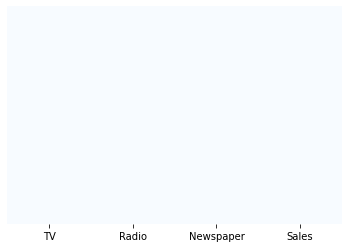

In [5]:
# Exploratory data analysis

# Review if missing data present 

sns.heatmap(ad_df.isnull(), yticklabels= False, cbar = False, cmap = 'Blues')

array([[<AxesSubplot:title={'center':'TV'}>,
        <AxesSubplot:title={'center':'Radio'}>],
       [<AxesSubplot:title={'center':'Newspaper'}>,
        <AxesSubplot:title={'center':'Sales'}>]], dtype=object)

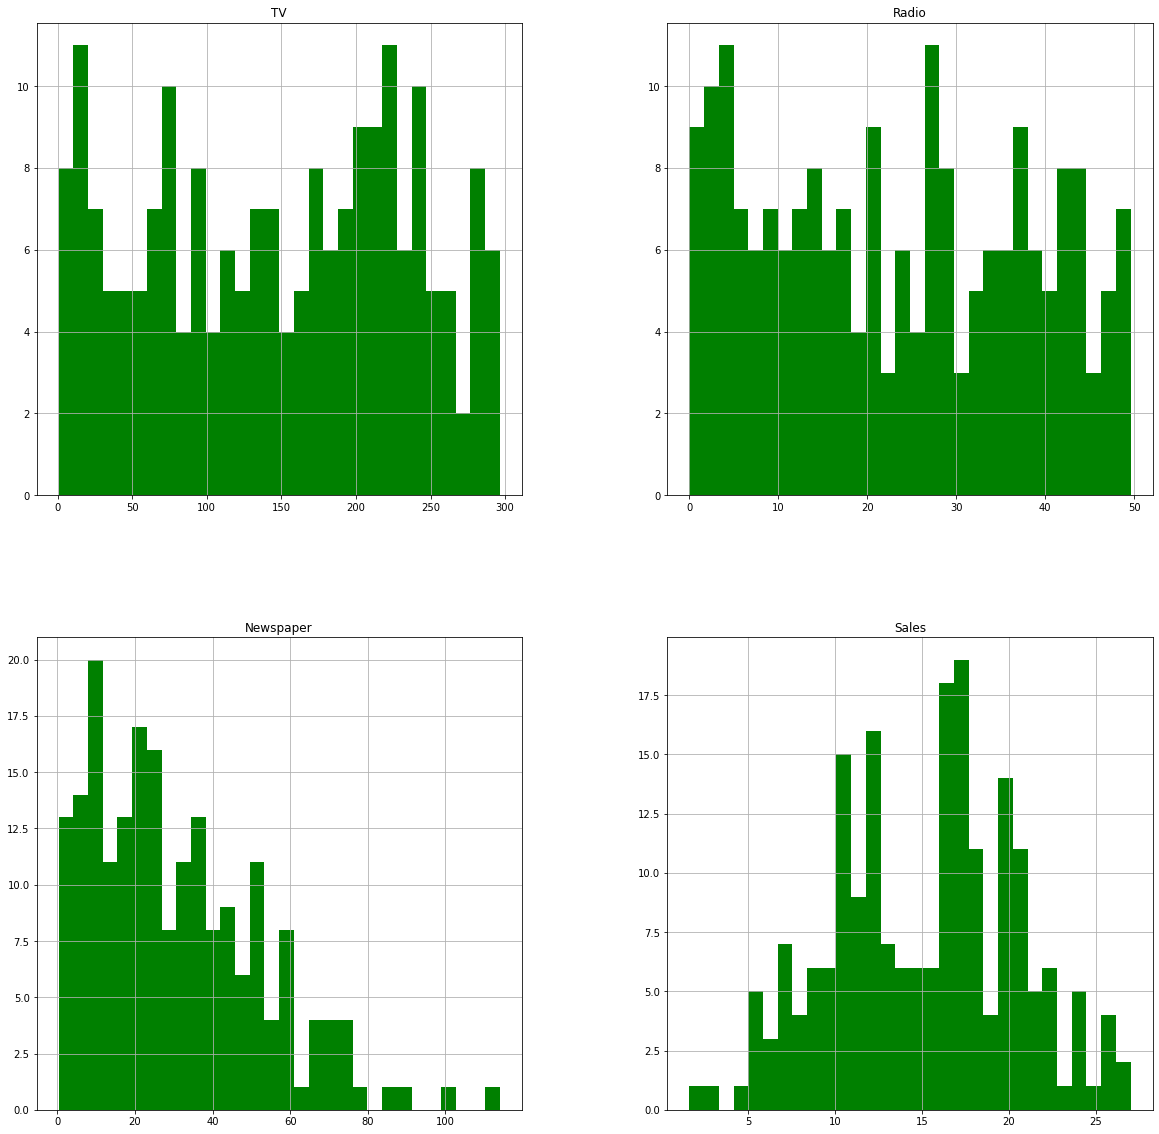

In [6]:
# Histogram of indepedent & dependent variable

ad_df.hist(bins = 30, figsize = (20, 20), color = 'g')

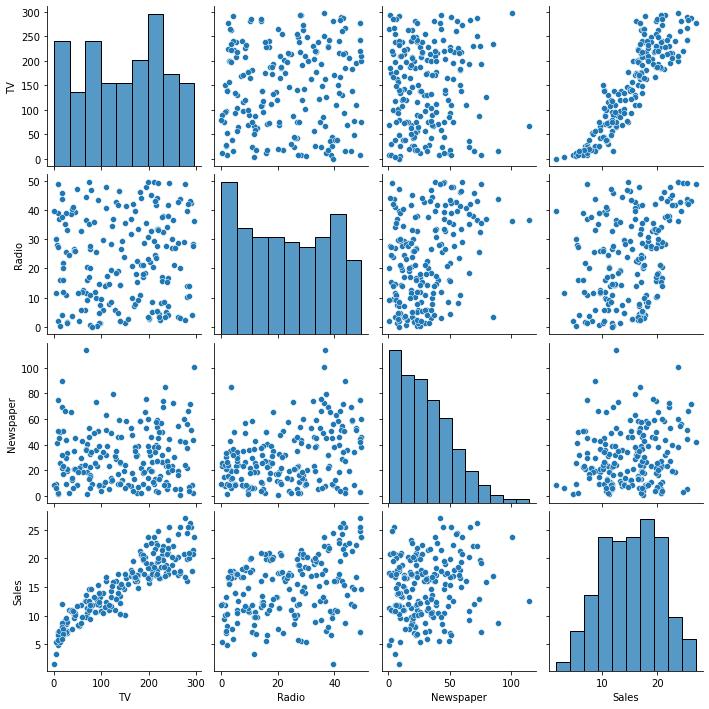

In [7]:
# Pairplot between indepedent & dependent variable

sns.pairplot(ad_df)

<AxesSubplot:>

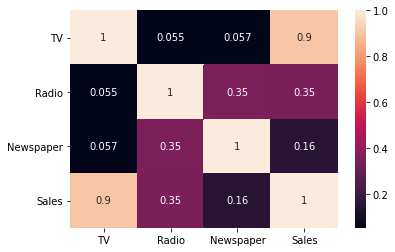

In [8]:
# Correlation matrix between indepedent & dependent variable

correlations = ad_df.corr()
sns.heatmap(correlations, annot = True)

In [9]:
# Indepedent variables dataframe

X = ad_df[['TV', 'Radio', 'Newspaper']]
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [10]:
# Shape of indepedent variables dataframe

X.shape

(200, 3)

In [11]:
# Dependent variable dataframe

y = ad_df['Sales']
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [12]:
# Shape of dependable variable dataframe

y.shape

(200,)

In [13]:
# Split for train & test 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train.shape

(160, 3)

In [14]:
# Shape for test

X_test.shape

(40, 3)

In [15]:
# Train the model 

from sklearn.linear_model import LinearRegression

regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train, y_train)

print('Linear Model Coeff (m):', regressor.coef_)
print('Linear Model Coeff(b):', regressor.intercept_)

Linear Model Coeff (m): [0.05522929 0.10774761 0.00804513]
Linear Model Coeff(b): 4.359437703361907


In [16]:
# Evaluate model

y_predict = regressor.predict(X_test)
y_predict

array([21.25343614, 10.15516536,  8.76745079, 20.91300866, 18.34205107,
       16.7078286 , 15.74184496,  7.70186548, 17.44970805, 11.88722157,
       18.24117992,  9.89906516, 11.41445734,  9.38869166, 18.35927407,
       21.09510049, 20.4196265 ,  9.57113645, 12.37951391, 23.83174184,
       11.6352228 , 12.38523326,  9.77380484, 18.20036606, 11.01608316,
       13.20317467, 13.89405223, 19.66465309, 21.65766003,  8.31642527,
       20.52242616, 13.34657685, 19.26206903, 10.72061761, 14.98598989,
        9.85526105,  9.34514698, 18.47653966,  8.12338764, 11.08421652])

In [17]:
# Predict for dependent variable

y_test

104    20.7
196    14.0
66     11.0
184    17.6
81     17.3
45     16.1
112    17.1
60      8.1
105    15.0
94     11.5
113    20.9
38     10.1
1      10.4
126     6.6
165    16.9
102    19.8
142    20.1
107    12.0
90     14.0
61     24.2
80     11.8
145    10.3
149    10.1
40     16.6
190    10.8
7      13.2
159    12.9
131    17.7
150    16.1
182     8.7
68     18.9
161    13.3
168    17.1
75      8.7
123    15.2
34     11.9
158     7.3
146    18.2
56      5.5
134    10.8
Name: Sales, dtype: float64

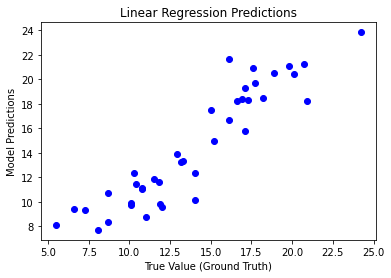

In [18]:
# Scatter plot 

plt.scatter(y_test, y_predict, color = 'b')
plt.ylabel('Model Predictions')
plt.xlabel('True Value (Ground Truth)')
plt.title('Linear Regression Predictions')
plt.show()

In [19]:
# RMSE (Root Mean Squared Error), MSE (Mean Squared Error), MAE (Mean Absolute Error), Mean Absolute Percentage Error

from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)), '.3f')) # 3 decimal points
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
MAPE = np.mean( np.abs( (y_test - y_predict) / y_test ) ) * 100

print('RMSE =', RMSE, '\nMSE =', MSE, '\nMAE =', MAE, '\nMean Absolute Percentage Error =', MAPE, '%')

RMSE = 1.864 
MSE = 3.4739328561123757 
MAE = 1.4244234844139816 
Mean Absolute Percentage Error = 11.649065681286066 %
